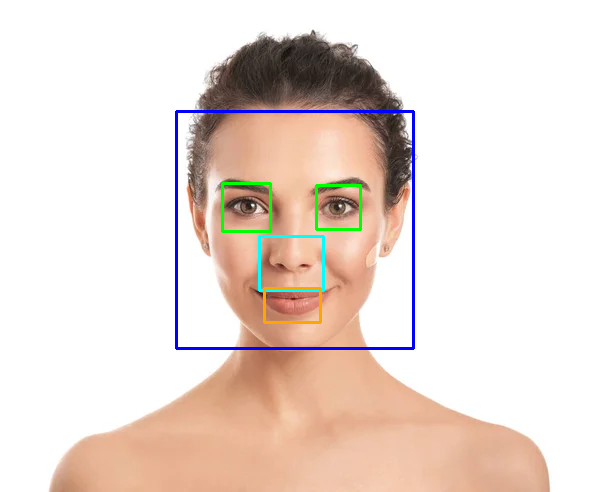

In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Haar cascade dosyalarını yükle
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')  # gözlük destekli daha güçlü model
nose_detector = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')

mouth_detector = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')  # manuel yüklenen ağız detektörü

# Görseli oku
image_path = "/yüz.jpg"
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Görsel bulunamadı: {image_path}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Yüzleri bul
faces = face_detector.detectMultiScale(gray, 1.1, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_color = img[y:y+h, x:x+w]
    roi_gray = gray[y:y+h, x:x+w]

    # Gözleri bul
    eyes = eye_detector.detectMultiScale(roi_gray, 1.1, 10)
    eye_boxes = []
    for (ex, ey, ew, eh) in eyes:
        if ew > 8 and eh > 8:  # Filtre yumuşatıldı
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            eye_boxes.append((ex, ey, ex+ew, ey+eh))

    # Burnu bul
    nose = nose_detector.detectMultiScale(roi_gray, 1.3, 5)
    for (nx, ny, nw, nh) in nose:
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (255, 255, 0), 2)
        break

    # Ağızları bul
    for (mx, my, mw, mh) in mouth_detector.detectMultiScale(roi_gray, 1.5, 19):
        if my > h * 0.6:  # yüzün alt kısmında olmalı
            overlaps = False
            for (ex1, ey1, ex2, ey2) in eye_boxes:
                if not (mx + mw < ex1 or mx > ex2 or my + mh < ey1 or my > ey2):
                    overlaps = True
                    break
            if not overlaps:
                cv2.rectangle(roi_color, (mx, my), (mx + mw, my + mh), (0, 165, 255), 2)
                break

# Görseli göster
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
